# Q5

In [33]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

## part a

<h3> in this section we want to implement histogram equalization </h3>
<h3> you can use opencv library </h3>

In [34]:
image = cv2.imread('Q5_image/img_improvment.png',cv2.IMREAD_GRAYSCALE)
output_image = image.copy()
equalize_image = image.copy()

hist, bins = np.histogram(equalize_image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf = cdf/cdf[-1]
# Apply histogram equalization using numpy indexing
equalize_image = cdf[image] * 255

# Convert the equalized image to unsigned 8-bit integers
equalize_image = np.uint8(equalize_image)

(-0.5, 383.5, 287.5, -0.5)

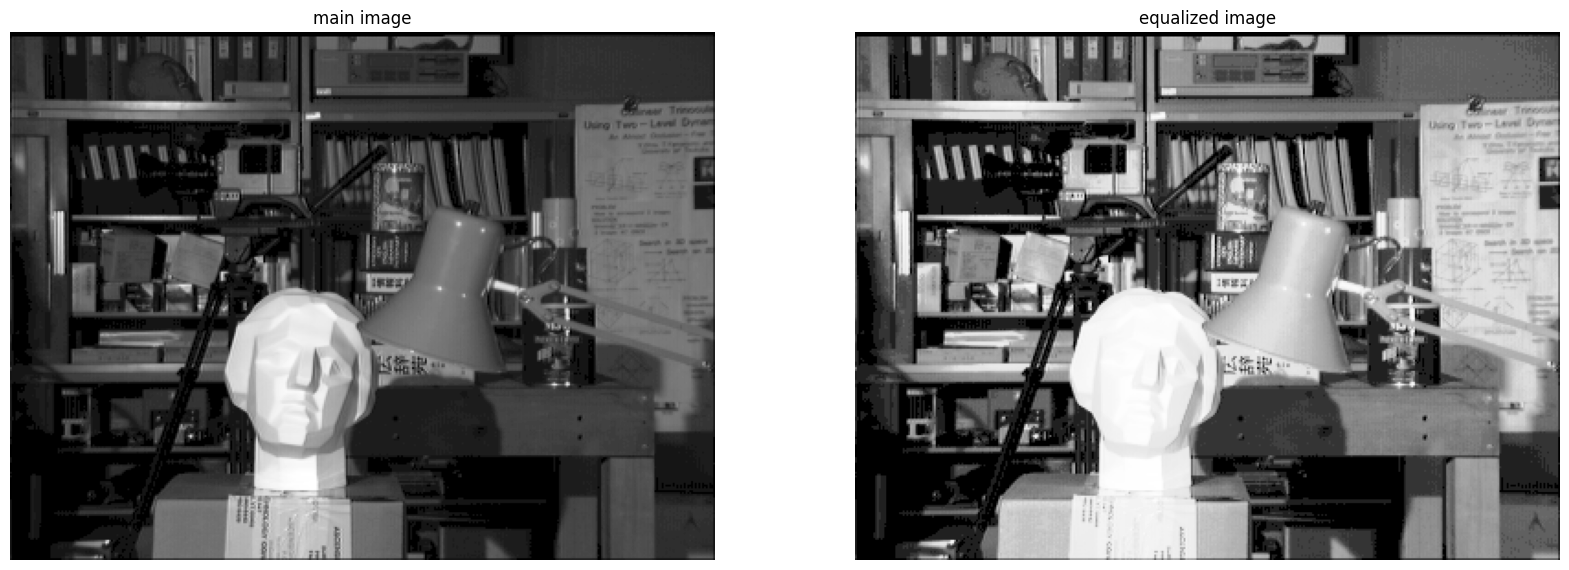

In [35]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(equalize_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part b

<h3> in this section we want to implement the first method for ACE </h3>
<h3> you can use opencv library </h3>
<h3> use 48(6*8) grids (size of the grids should be 48*48) </h3> 

In [36]:
def ACE1(image, gridSize):
  '''
  you can use the equalize function of OpenCV for each grid
  Use first method for ACE implementation (calculating transition function for each grid)
  input(s):
    image (ndarray): input image
    gridSize (int): window size for calculating histogram equalization
  output(s):
    output (ndarray): improved image
  '''
  x,y = image.shape
  output_image = image.copy()

  for i in range(0,x,gridSize):
    for j in range(0,y,gridSize):
      grid = image[i:i+gridSize,j:j+gridSize]
      hist, bins = np.histogram(grid.flatten(),256,[0,256])
      cdf = hist.cumsum()
      cdf = cdf/cdf[-1]
      # Apply histogram equalization using numpy indexing
      grid = cdf[grid] * 255
      # Convert the equalized image to unsigned 8-bit integers
      grid = np.uint8(grid)
      output_image[i:i+gridSize,j:j+gridSize] = grid
    
  return output_image

(-0.5, 383.5, 287.5, -0.5)

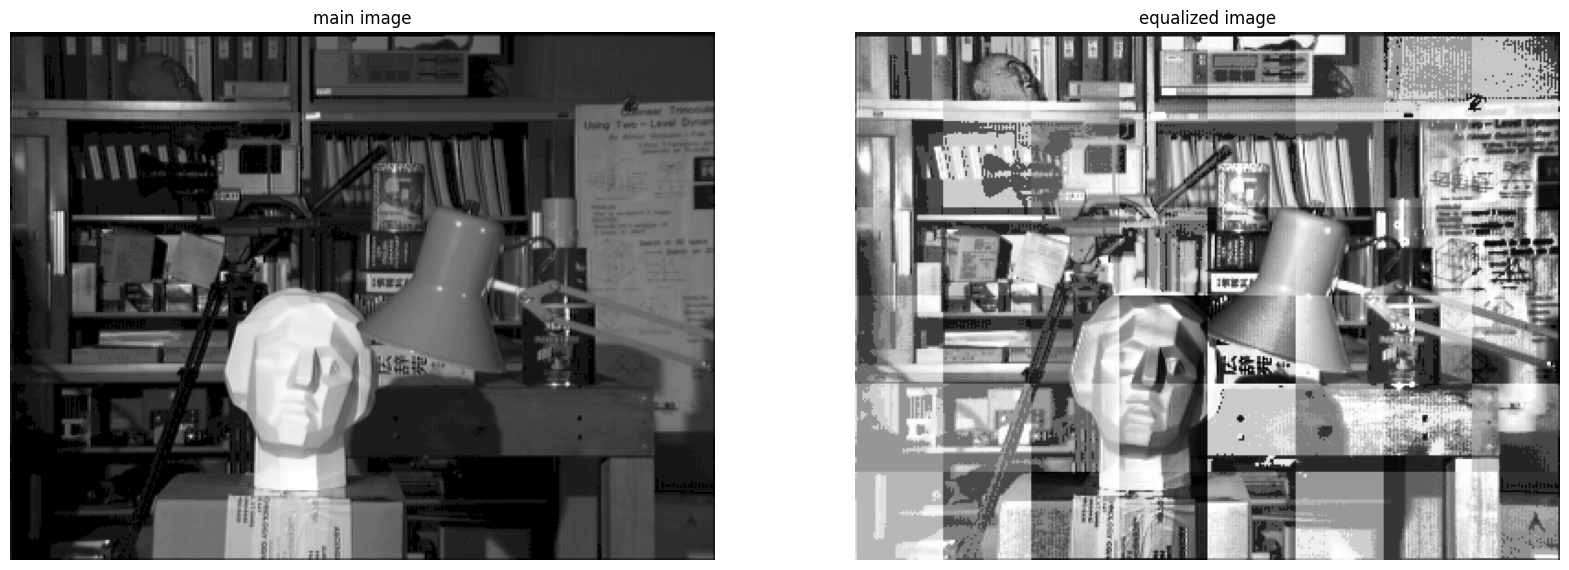

In [37]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE1(image,48)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part c

<h3> in this section we want to implement the second method for ACE </h3>
<h3> you can use opencv library </h3>

In [38]:
def ACE2(image, gridSize):
    '''
    you can just use the equalize function of OpenCV for each grid
    You can use OpenCV built-in tools for applying padding
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
    output(s):
      output (ndarray): improved image
    '''
    
    # ACE2(image,(70,70))
    output = image.copy()
    pad = (gridSize[0]//2,gridSize[1]//2)
    image = cv2.copyMakeBorder(image,pad[0],pad[0],pad[1],pad[1],cv2.BORDER_CONSTANT,value=0)
    x,y = image.shape
    for i in range(pad[0],x-pad[0]):
      for j in range(pad[1],y-pad[1]):
        grid = image[i-pad[0]:i+pad[0]+1,j-pad[1]:j+pad[1]+1]
        hist, bins = np.histogram(grid.flatten(),256,[0,256])
        cdf = hist.cumsum()
        cdf = cdf/cdf[-1]
        # Apply histogram equalization using numpy indexing
        grid = cdf[grid] * 255
        # Convert the equalized image to unsigned 8-bit integers
        grid = np.uint8(grid)
        output[i-pad[0],j-pad[1]] = grid[pad[0],pad[1]]
    return output

(-0.5, 383.5, 287.5, -0.5)

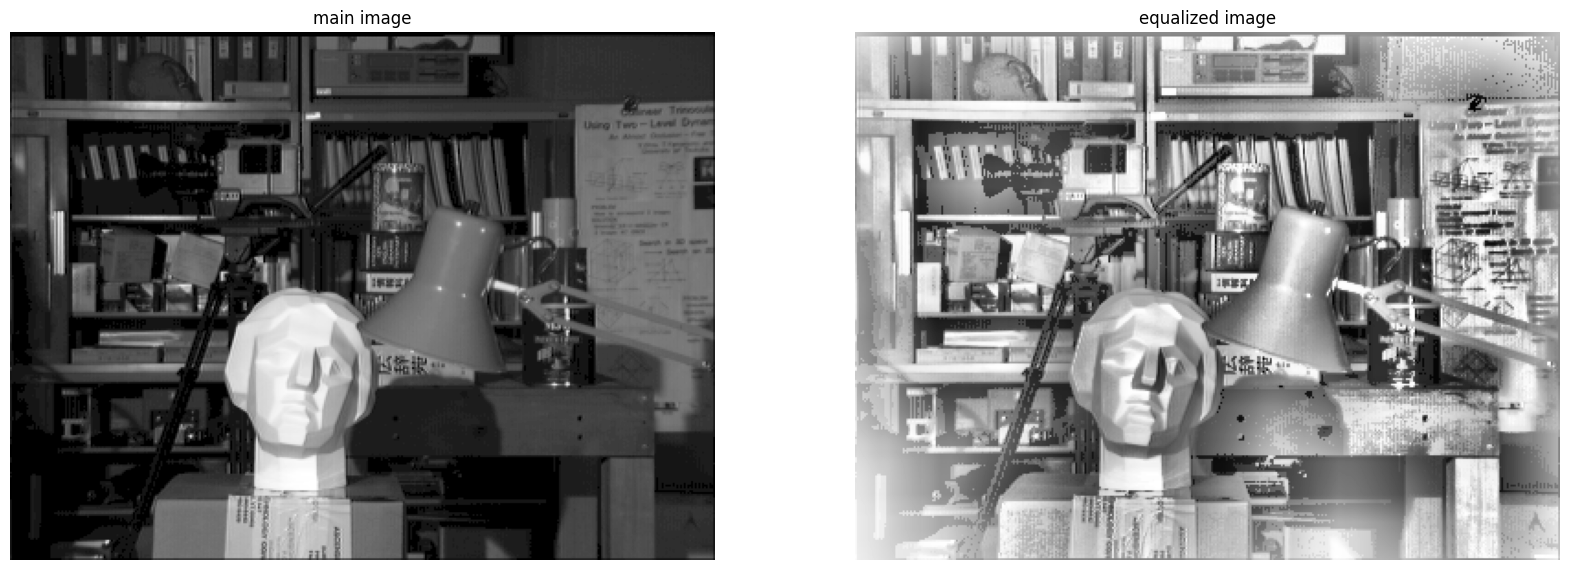

In [39]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE2(image,(70,70))
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part d

<h3> in this section we want to implement CLAHE </h3>
<h3><b> note : you can just use opencv library for calculate histogram and applying padding </b></h3>
<h3><b>note : you can't use the equalize function of opencv</b></h3>

In [58]:
def CLAHE(image, gridSize, clip_limit):
    '''
    you can just use opencv library for calculate histogram and applying padding
    you can't use the equalize function of opencv
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
      clip_limit (int): threshold for contrast limiting
    output(s):
      output (ndarray): improved image
    '''
    output = image.copy()
    pad = (gridSize[0]//2, gridSize[1]//2)
    image_padded = cv2.copyMakeBorder(image, pad[0], pad[0], pad[1], pad[1], cv2.BORDER_REFLECT)
    x, y = image.shape
    for i in range(pad[0], x + pad[0]):
        for j in range(pad[1], y + pad[1]):
            hist = np.histogram(image_padded[i - pad[0]:i + pad[0] + 1, j - pad[1]:j + pad[1] + 1].flatten(), 256, [0, 256])[0]
            hist = np.clip(hist, 0, clip_limit)
            hist = hist + clip_limit
            cdf = np.cumsum(hist)
            cdf = cdf / cdf[-1]
            output[i - pad[0], j - pad[1]] = cdf[image[i - pad[0], j - pad[1]]] * 255
    return output

(-0.5, 383.5, 287.5, -0.5)

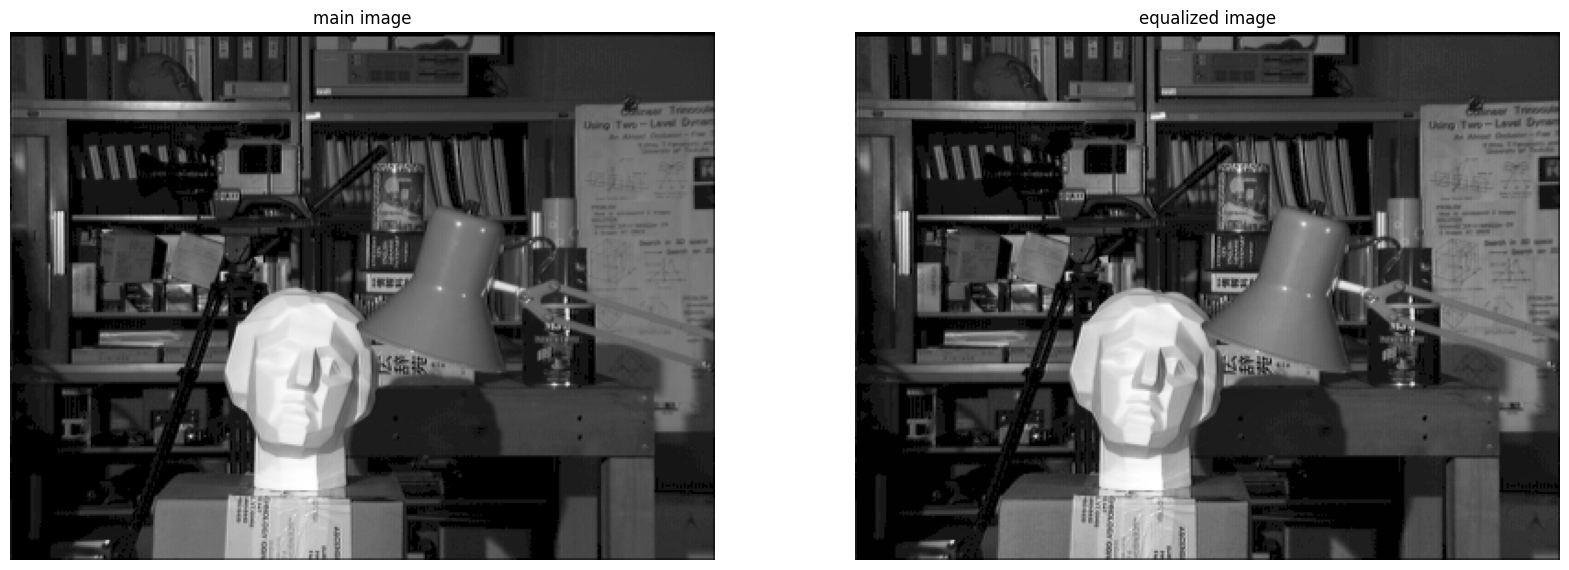

In [63]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = CLAHE(image,(70,70), 100)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')